***Box office Revenue Prediction***
When a movie is produced, if the revenue that would be acquired could be predicted beforehand that will be something right. The revenue prediction helps to do exactly that. It use an Ensemble Learning Technique to analyse the same and help to predict the revenue based on genre or the budget etc.

***XGBoost*** is designed for speed, ease of use, and performance on large datasets. It does not require optimization of the parameters or tuning, which means that it can be used immediately after installation without any further configuration.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

 load the dataset into the panda’s data frame.

In [48]:
data=pd.read_csv('/content/drive/MyDrive/Softronics/Classwork/boxofficedata.csv')

In [49]:
data.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


In [50]:
data.shape

(2694, 10)

In [51]:
data.info


<bound method DataFrame.info of                                         title domestic_revenue  \
0     Star Wars: Episode VIII - The Last Jedi     $620,181,382   
1                     The Fate of the Furious     $226,008,385   
2                                Wonder Woman     $412,563,408   
3              Guardians of the Galaxy Vol. 2     $389,813,101   
4                        Beauty and the Beast     $504,014,165   
...                                       ...              ...   
2689                                  Get Out     $176,040,665   
2690                    The Lego Batman Movie     $175,750,384   
2691                                     Coco     $209,726,015   
2692                                  Dunkirk     $188,045,546   
2693                           Justice League     $229,024,295   

       world_revenue                          distributor opening_revenue  \
0     $1,332,539,889  Walt Disney Studios Motion Pictures    $220,009,584   
1     $1,236,005,118 

we can observe an unusual discrepancy in the dtype column the columns which should be in the number format are also in the object type. This means we need to clean the data before moving any further.

In [52]:
data.describe().T

,count,unique,top,freq
title,2694,2468,A Beautiful Planet,3
domestic_revenue,2694,2495,"$11,272,008",3
world_revenue,2694,2501,"$25,681,505",3
distributor,2694,248,Fathom Events,292
opening_revenue,2390,2176,"$4,696",3
opening_theaters,2383,732,1,503
budget,397,124,"$40,000,000",14
MPAA,1225,8,R,568
genres,2655,567,Documentary,351
release_days,2694,457,347,35


There are times when we need to clean the data because the raw data contains lots of noise and irregularities and we cannot train an ML model on such data. Hence, data cleaning is an important part of any machine-learning pipeline.

In [53]:
r=['opening_revenue', 'world_revenue']
data.drop(r, axis=1, inplace=True)

In [54]:
data

,title,domestic_revenue,distributor,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382",Walt Disney Studios Motion Pictures,"4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385",Universal Pictures,"4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408",Warner Bros.,"4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101",Walt Disney Studios Motion Pictures,"4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165",Walt Disney Studios Motion Pictures,"4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290
...,...,...,...,...,...,...,...,...
2689,Get Out,"$176,040,665",Universal Pictures,"2,781","$4,500,000",R,"Horror,Mystery,Thriller",676
2690,The Lego Batman Movie,"$175,750,384",Warner Bros.,"4,088","$80,000,000",PG,"Action,Animation,Comedy,Family",325
2691,Coco,"$209,726,015",Walt Disney Studios Motion Pictures,"3,987",NaN,PG,"Adventure,Animation,Family,Fantasy,Music,Mystery",405
2692,Dunkirk,"$188,045,546",Warner Bros.,"3,720","$100,000,000",PG-13,"Action,Drama,History,Thriller,War",168


In [55]:
data.isnull().sum()*100/data.shape[0]

title                0.000000
domestic_revenue     0.000000
distributor          0.000000
opening_theaters    11.544172
budget              85.263549
MPAA                54.528582
genres               1.447661
release_days         0.000000
dtype: float64

In [56]:
data.drop('budget', axis=1, inplace=True)
for col in ['MPAA', 'genres']:
  data[col]=data[col].fillna(data[col].mode()[0])
data.dropna(inplace=True)
data.isnull().sum().sum()

0

In [57]:
data['domestic_revenue'] = data['domestic_revenue'].apply(lambda x: str(x)[1:] if pd.notnull(x) else x)
for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    data[col] = data[col].apply(str).str.replace('.', '')
    temp = ~data[col].isnull()
    data.loc[temp, col] = data.loc[temp, col].convert_dtypes(float)
    data[col] = pd.to_numeric(data[col], errors='coerce')

<ipython-input-57-851587416d0c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].apply(str).str.replace('.', '')
<ipython-input-57-851587416d0c>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[temp, col] = data.loc[temp, col].convert_dtypes(float)


In [58]:
data['MPAA'].unique()

array(['PG-13', 'PG', 'R', 'Not Rated', 'G', 'NC-17', 'M/PG'],
      dtype=object)

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations

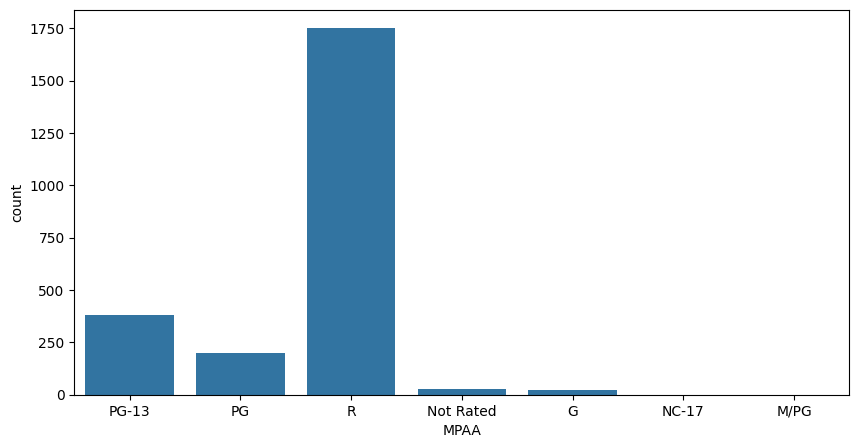

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='MPAA')
plt.show()

In [60]:
data.groupby('MPAA').mean()['domestic_revenue']

<ipython-input-60-60f02db312c1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('MPAA').mean()['domestic_revenue']


MPAA
G                   NaN
M/PG                NaN
NC-17               NaN
Not Rated           NaN
PG                  NaN
PG-13        666.000000
R            688.833333
Name: domestic_revenue, dtype: float64

<ipython-input-61-d3bebc518eb3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)
<ipython-input-61-d3bebc518eb3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-61-d3bebc518eb3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use th

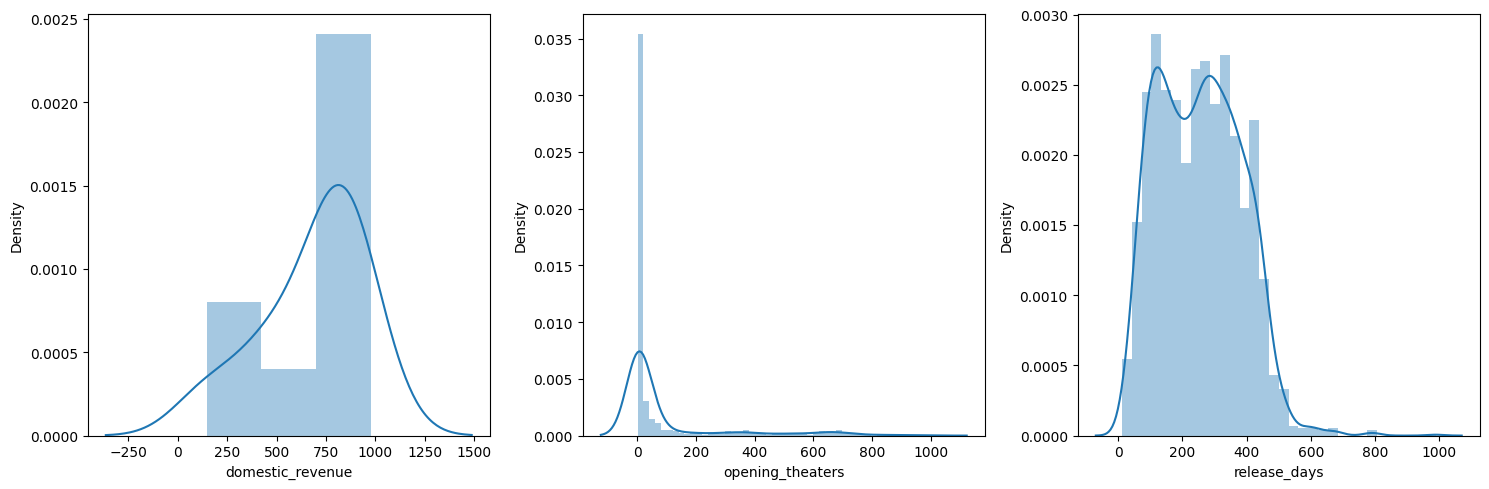

In [61]:
plt.subplots(figsize=(15,5))
features=['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
  plt.subplot(1, 3, i+1)
  sns.distplot(data[col])
plt.tight_layout()
plt.show()

<ipython-input-62-a6950ce44b12>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


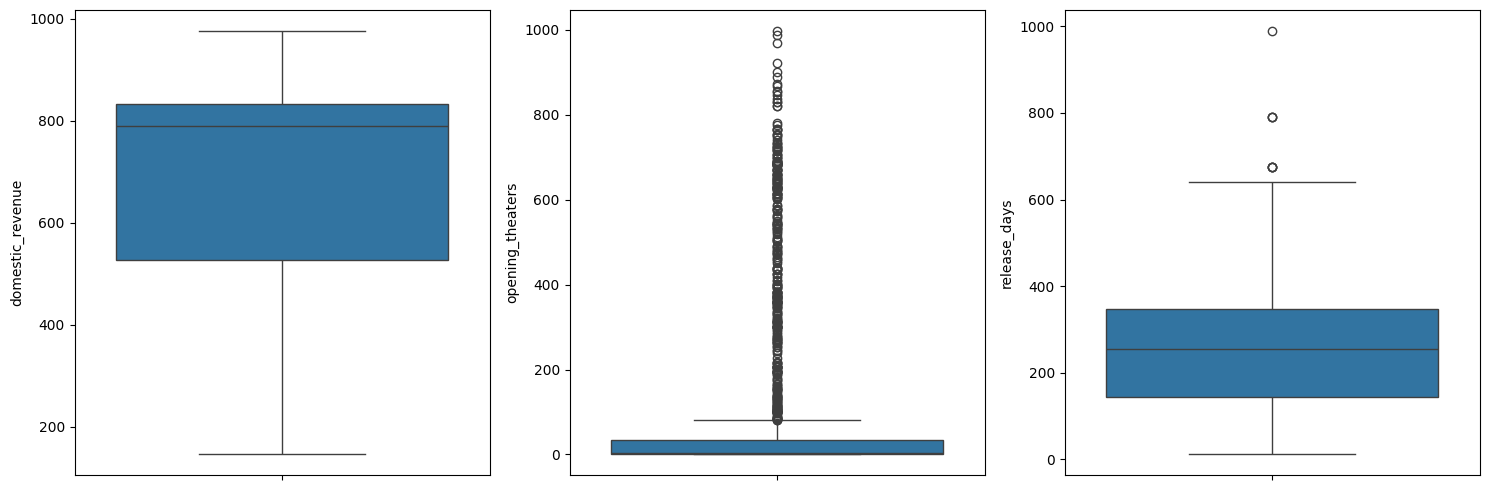

In [62]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(features):
  plt.subplot(1, 3, i+1)
  sns.boxplot(data[col])
plt.tight_layout()
plt.show()

In [63]:
for col in features:
  data[col]=data[col].apply(lambda x: np.log10(x))

<ipython-input-64-d23f2340a252>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)
<ipython-input-64-d23f2340a252>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-64-d23f2340a252>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use th

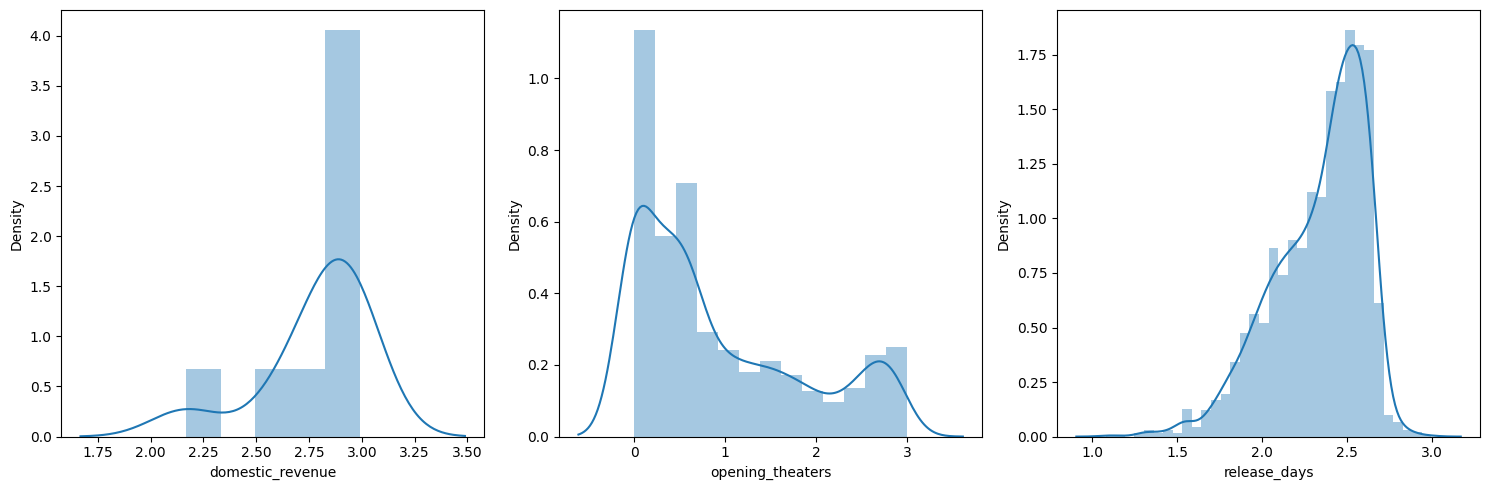

In [64]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(features):
  plt.subplot(1, 3, i+1)
  sns.distplot(data[col])
plt.tight_layout()
plt.show()

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(data['genres'])
features=vectorizer.transform(data['genres']).toarray()
genres=vectorizer.get_feature_names_out()
for i, name in enumerate(genres):
  data[name]=features[:,i]
data.drop('genres', axis=1, inplace=True)

In [66]:
removed=0
for col in data.loc[:,'action':'history'].columns:
  if(data[col]==0).mean()>0.95:
    removed+=1
    data.drop(col, axis=1, inplace=True)
print(removed)
print(data.shape)

2
(2383, 33)


In [67]:
for col in ['distributor', 'MPAA']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

<ipython-input-68-127a54c22582>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() > 0.8,


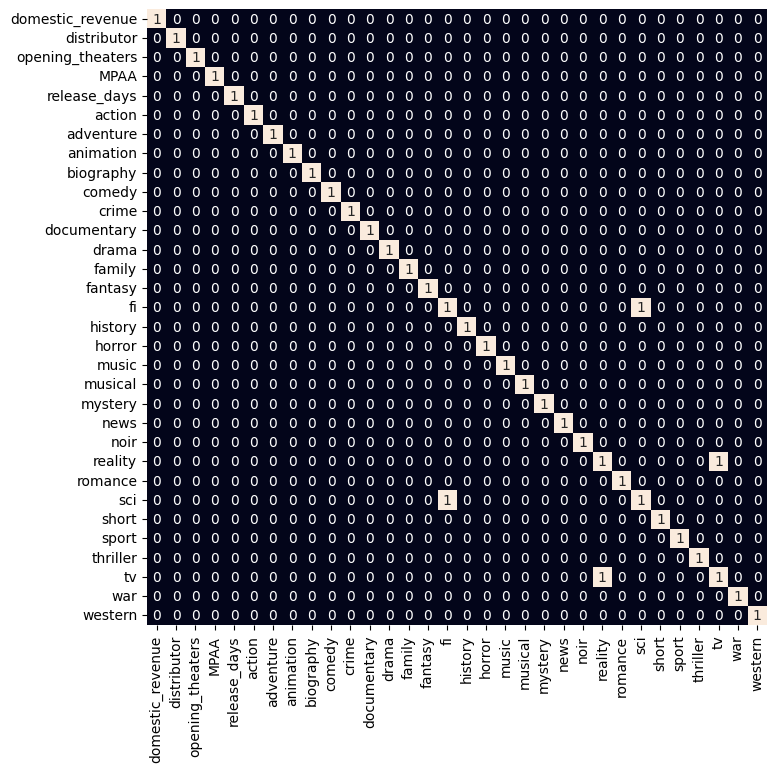

In [68]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()

**Model Development**:
Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [69]:
features = data.drop(['title', 'domestic_revenue', 'fi'], axis=1)
target = data['domestic_revenue'].values

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.1,
									random_state=22)
X_train.shape, X_val.shape

((2144, 30), (239, 30))

In [70]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [83]:
#Replace NaN values with the mean
import numpy as np
Y_train = np.nan_to_num(Y_train, nan=np.nanmean(Y_train))
Y_val = np.nan_to_num(Y_val, nan=np.nanmean(Y_val))

XGBoost library models help to achieve state-of-the-art results most of the time so, we will also train this model to get better results.

In [84]:
from sklearn.metrics import mean_absolute_error as mae
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
# Check if there are any non-NaN values in Y_val
if np.isnan(Y_val).all():
    # Set a default value (you can adjust this based on your needs)
    default_value = 0
    Y_val = np.full_like(Y_val, fill_value=default_value)
else:
    # Calculate the mean as usual
    Y_val = np.nan_to_num(Y_val, nan=np.nanmean(Y_val))

In [86]:
print(np.isnan(X_train).any())
print(np.isnan(Y_train).any())
print(np.isnan(X_val).any())
print(np.isnan(Y_val).any())

False
False
False
False


In [87]:
#Initialize a list of XGBRegressor models
models = [XGBRegressor() for _ in range(1)]
# Replace num_models with the number of models you want

# Now, proceed with training and evaluation
for i, model in enumerate(models):
    model.fit(X_train, Y_train)

    train_preds = model.predict(X_train)
    print('Training Error for model {}: {}'.format(i, mae(Y_train, train_preds)))

    val_preds = model.predict(X_val)
    print('Validation Error for model {}: {}'.format(i, mae(Y_val, val_preds)))
    print()

Training Error for model 0: 0.00020500073676173533
Validation Error for model 0: 2.783311976548518

